In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


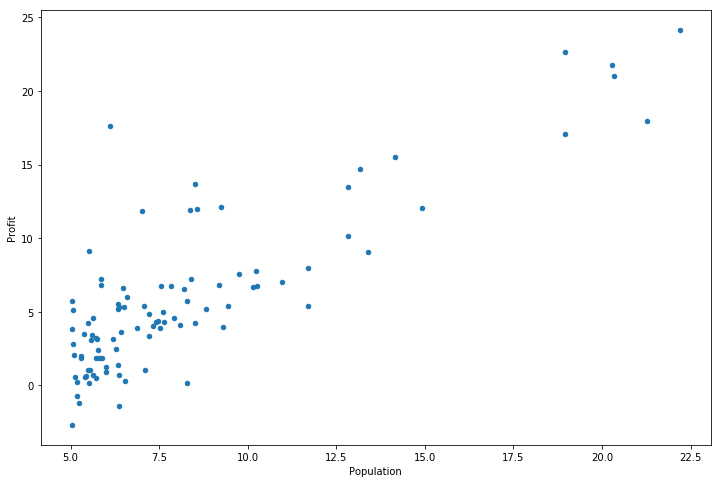

In [6]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

In [18]:
#获取列数
cols = data.shape[1]
#将数据和标签分开
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
#在X中插入一列，这样可以不用写b
X.insert(0,'ones',1)
#转换成np.array，方便计算
X = np.array(X)
y = np.array(y)
theta = np.zeros([1,2])

In [27]:
def compute_loss(X,y,theta):
    inner = np.power((X@theta.T-y),2)
    return np.sum(inner)/(2*len(X))

In [28]:
X = np.array(X)
y = np.array(y)
theta = np.zeros([1,2])

In [29]:
compute_loss(X,y,theta)

32.072733877455676

In [72]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        error = (X@theta.T)- y
        theta = theta - alpha*(error.T@X)/len(X)
        cost = compute_loss(X,y,theta)
        costs.append(cost)
        if i%100==0:
            print('第{}次循环，loss={}'.format(i,cost))
    return theta,costs

In [73]:
alpha = 0.01
iters = 1000
g,cost = gradientDescent(X,y,theta,alpha,iters)

第0次循环，loss=6.737190464870009
第100次循环，loss=5.476362817272741
第200次循环，loss=5.173634551165023
第300次循环，loss=4.962606493117519
第400次循环，loss=4.815501494116686
第500次循环，loss=4.712956453749759
第600次循环，loss=4.6414735988143185
第700次循环，loss=4.591643801766726
第800次循环，loss=4.5569080784097515
第900次循环，loss=4.532694243543437


In [74]:
compute_loss(X,y,g)

4.515955503078914

In [75]:
g

array([[-3.24140214,  1.1272942 ]])

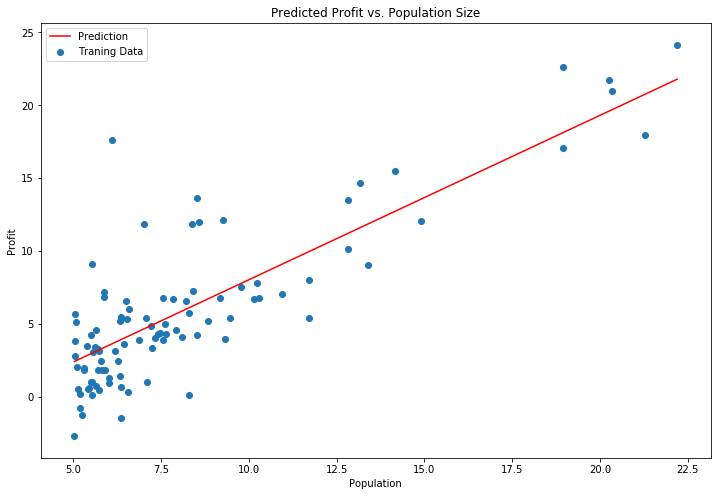

In [79]:
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0]+g[0,1]*x
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

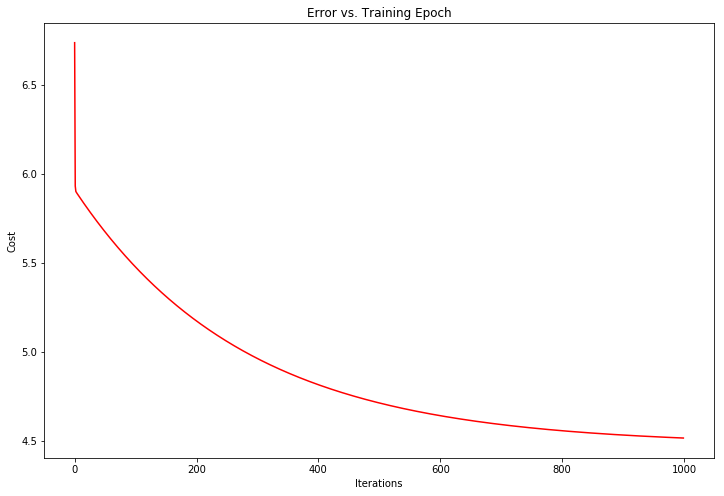

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()